In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import mne
from data_functions.edf import EDFOperations

In [2]:
USEFUL_CHANNELS = [
    "FP1-F7",
    "F7-T7",
    "T7-P7",
    "P7-O1",
    "FP1-F3",
    "F3-C3",
    "C3-P3",
    "P3-O1",
    "FP2-F4",
    "F4-C4",
    "C4-P4",
    "P4-O2",
    "FP2-F8",
    "F8-T8",
    "T8-P8",
    "P8-O2",
    "FZ-CZ",
    "CZ-PZ",
    "T7-FT9",
    "FT9-FT10",
    "FT10-T8"
]

In [3]:
dataset_dirpath = Path("/media/marco741/Archive/Datasets/CHB MIT")
FILENAME = "chb02_01.edf"
patient_name = FILENAME.split("_")[0]
edf_filepath = dataset_dirpath/patient_name/FILENAME

In [4]:
o = EDFOperations()
raw_edf = o.read_raw_edf(edf_filepath, useful_channels=USEFUL_CHANNELS)

Extracting EDF parameters from /media/marco741/Archive/Datasets/CHB MIT/chb02/chb02_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/home/marco741/Documents/Tesi/epilepsy_prediction/scripts/dataset/data_functions/edf.py:14: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_edf = mne.io.read_raw_edf(edf_path, stim_channel=None, include=useful_channels)  # type: ignore


Using matplotlib as 2D backend.


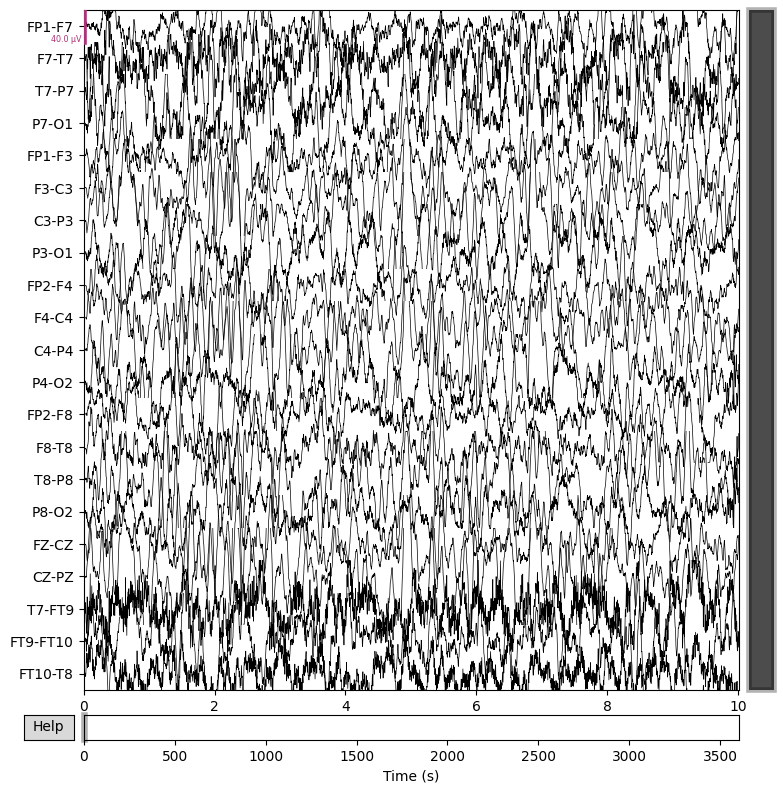

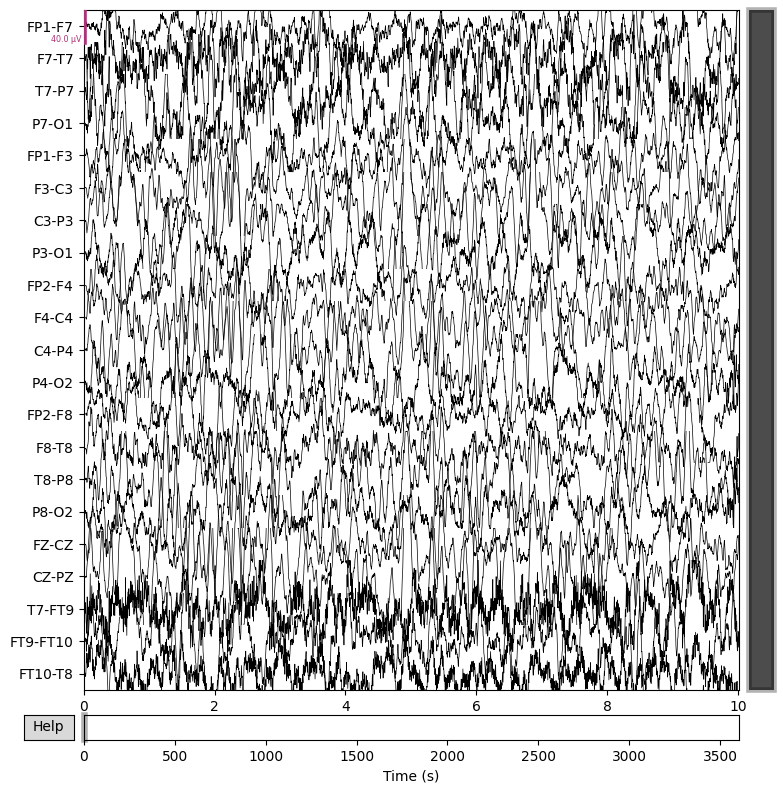

In [5]:
raw_edf.plot(n_channels=21)

In [6]:
o = EDFOperations()
raw_edf = o.read_raw_edf(edf_filepath, useful_channels=USEFUL_CHANNELS)
epochs = o.split_epochs(raw_edf)
preprocessed_epochs = o.preprocess_epochs(epochs)
numpy_epochs_data = o.epochs_to_numpy(preprocessed_epochs)
data = o.preprocess_numpy(numpy_epochs_data)
single_channel_data = np.concatenate(data.mean(axis=1)[:10])

Extracting EDF parameters from /media/marco741/Archive/Datasets/CHB MIT/chb02/chb02_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Not setting metadata
3600 matching events found
No baseline correction applied
0 projection items activated
Loading data for 3600 events and 256 original time points ...


/home/marco741/Documents/Tesi/epilepsy_prediction/scripts/dataset/data_functions/edf.py:14: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_edf = mne.io.read_raw_edf(edf_path, stim_channel=None, include=useful_channels)  # type: ignore


0 bad epochs dropped


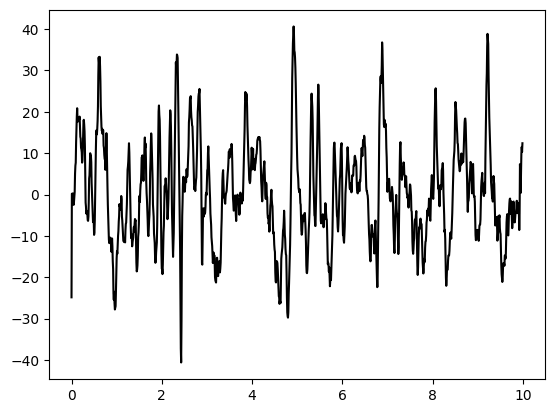

In [13]:
plt.plot(np.arange(len(single_channel_data))/128, single_channel_data, color="black")
plt.show()

In [40]:
o = EDFOperations(use_spectrograms=True)
raw_edf = o.read_raw_edf(edf_filepath, useful_channels=USEFUL_CHANNELS)
epochs = o.split_epochs(raw_edf)
preprocessed_epochs = o.preprocess_epochs(epochs)
numpy_epochs_data = o.epochs_to_numpy(preprocessed_epochs)
spectrograms = o.preprocess_numpy(numpy_epochs_data)
single_window_spectrogram = np.moveaxis(spectrograms[:6], 0, 2)

Extracting EDF parameters from /media/marco741/Archive/Datasets/CHB MIT/chb02/chb02_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Not setting metadata
3600 matching events found
No baseline correction applied
0 projection items activated
Loading data for 3600 events and 256 original time points ...


/home/marco741/Documents/Tesi/epilepsy_prediction/scripts/dataset/data_functions/edf.py:14: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_edf = mne.io.read_raw_edf(edf_path, stim_channel=None, include=useful_channels)  # type: ignore


0 bad epochs dropped
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 423 samples (1.652 sec)



/home/marco741/Documents/Tesi/epilepsy_prediction/scripts/dataset/data_functions/edf.py:30: RuntimeWarning: filter_length (423) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  epochs = epochs.filter(8, 13)  # type: ignore
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 75600 out of 75600 | elapsed:   11.4s finished


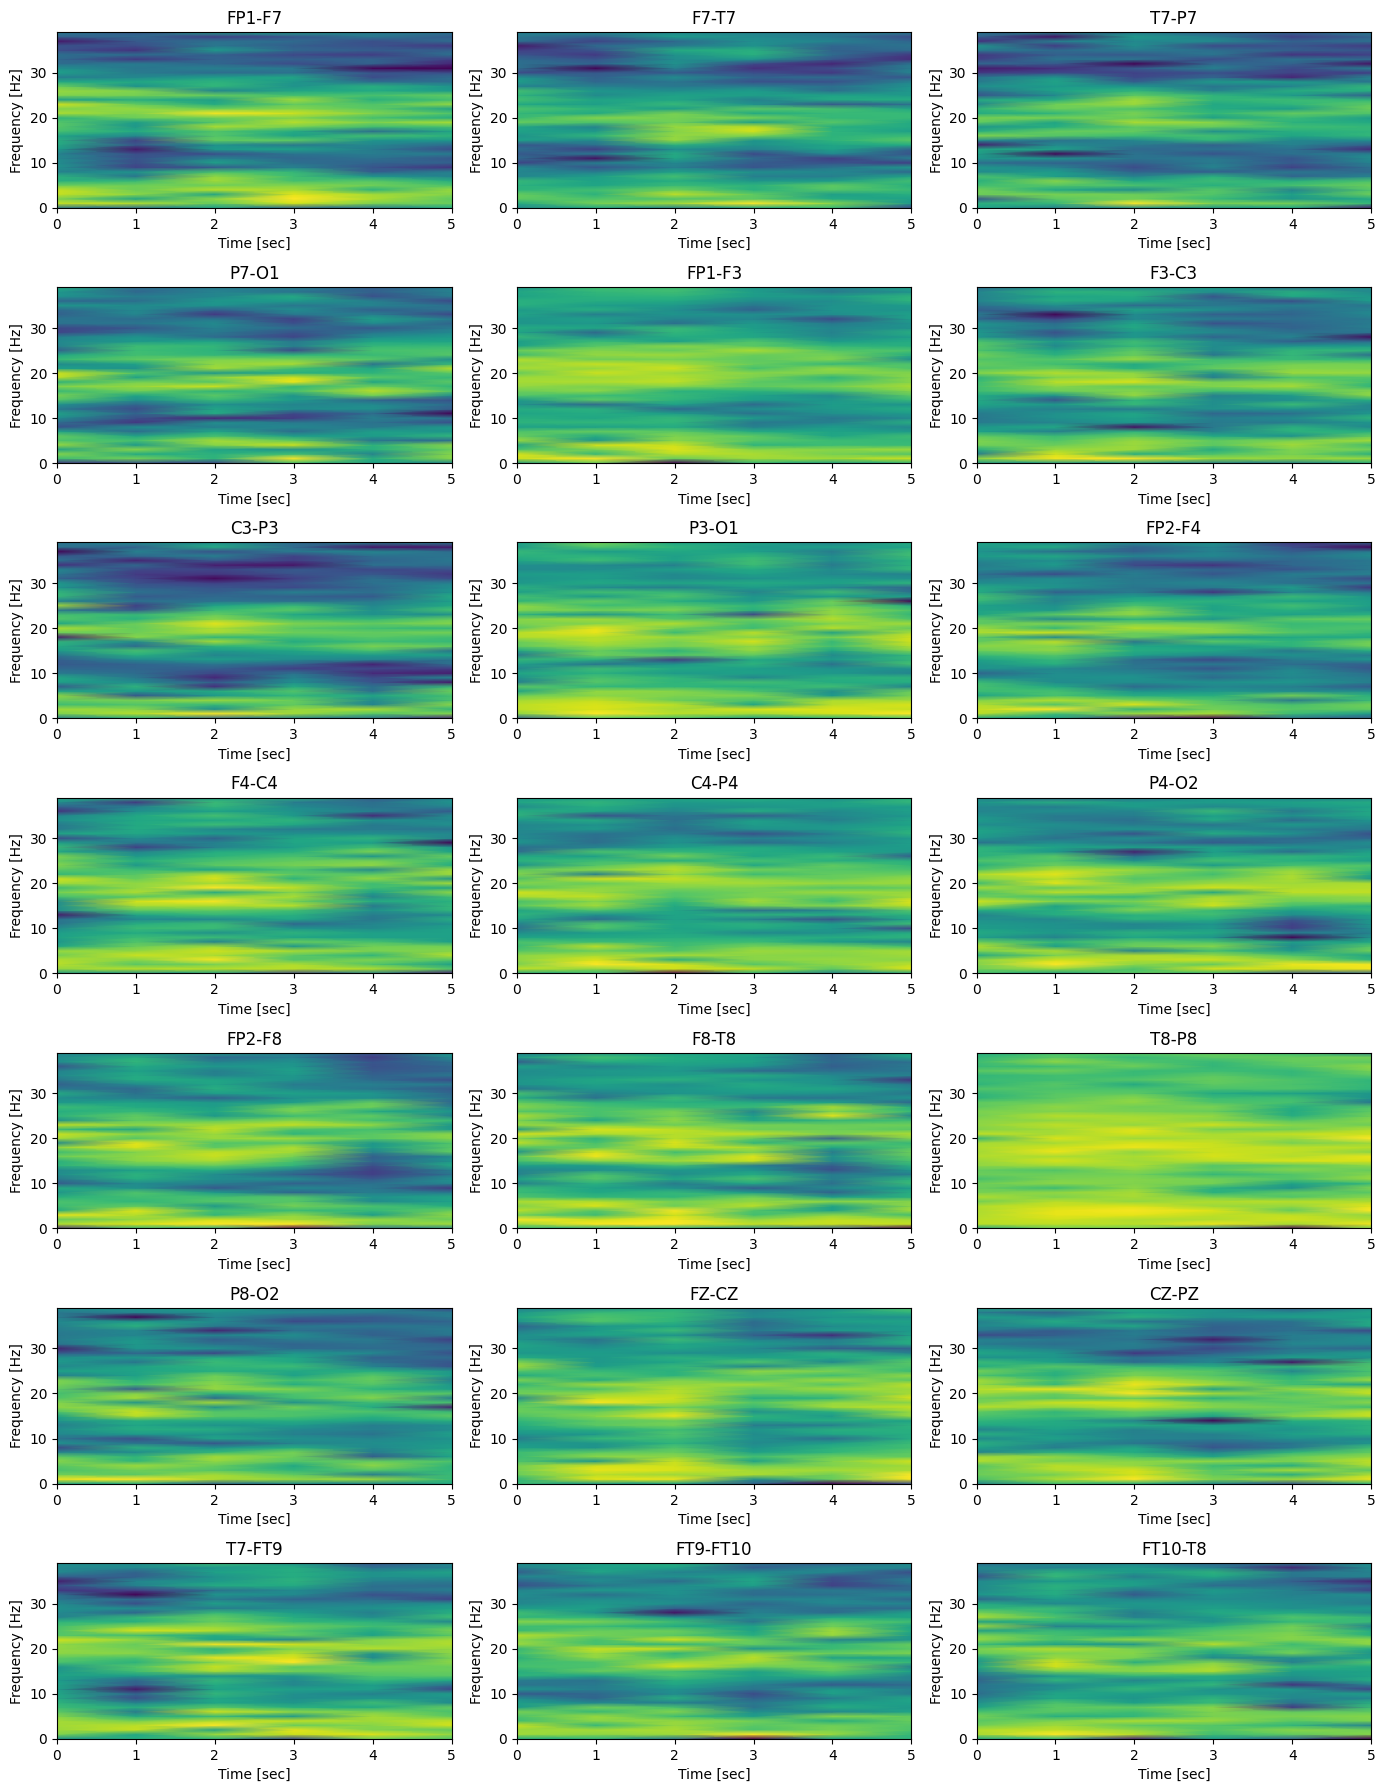

In [41]:
def plot_spectrogram(data, channels):
    plt.figure(figsize=(14, 18))
    for i in range(len(data)):
        plt.subplot(7, 3, i+1)
        Pxx = data[i]
        f = np.arange(Pxx.shape[0])
        t = np.arange(Pxx.shape[1])
        plt.tight_layout(pad=1.0)
        plt.pcolormesh(t, f, Pxx, shading='gouraud')
        plt.title(channels[i])
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
    plt.show()

plot_spectrogram(single_window_spectrogram, channels=USEFUL_CHANNELS)